In [16]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()
import missingno as msn
%matplotlib inline
import matplotlib.pyplot as plt
reg_data = pd.read_excel('WHR2018Chapter2OnlineData.xls',sheet_name = 'SupportingFactors')
data = pd.read_excel('WHR2018Chapter2OnlineData.xls',sheet_name = 'Table2.1')
region = pd.DataFrame(reg_data[["country","Region indicator"]])

In [17]:
data_M = data.merge(region, on='country', how='left')
col = list(data_M)
col.insert(1,col.pop(col.index('Region indicator')))
data_M = data_M.loc[:,col]
#data_M.head(100)

In [18]:
LL = pd.DataFrame(data_M['Life Ladder'])
GDP=pd.DataFrame(data_M['Log GDP per capita'])
SS=pd.DataFrame(data_M['Social support'])
LE=pd.DataFrame(data_M['Healthy life expectancy at birth'])
F=pd.DataFrame(data_M['Freedom to make life choices'])
G=pd.DataFrame(data_M['Generosity'])
CO=pd.DataFrame(data_M['Perceptions of corruption'])
PA=pd.DataFrame(data_M['Positive affect'])
NA=pd.DataFrame(data_M['Negative affect'])
CNG=pd.DataFrame(data_M['Confidence in national government'])
DQ=pd.DataFrame(data_M['Democratic Quality'])
DeQ=pd.DataFrame(data_M['Delivery Quality'])
#SD=pd.DataFrame(data_M['Standard deviation of ladder by country-year'])
#SD_M=pd.DataFrame(data_M['Standard deviation/Mean of ladder by country-year'])
GINI=pd.DataFrame(data_M['GINI index (World Bank estimate)'])
GINI_ave=pd.DataFrame(data_M['GINI index (World Bank estimate), average 2000-15'])
gini_hi=pd.DataFrame(data_M['gini of household income reported in Gallup, by wp5-year'])
L_GDP = pd.concat([LL, GDP], axis = 1, join_axes = [LL.index]).dropna()
L_SS = pd.concat([LL, SS], axis = 1, join_axes = [LL.index]).dropna()
L_LE = pd.concat([LL, LE], axis = 1, join_axes = [LL.index]).dropna()
L_F = pd.concat([LL, F], axis = 1, join_axes = [LL.index]).dropna()
L_G = pd.concat([LL, G], axis = 1, join_axes = [LL.index]).dropna()
L_CO = pd.concat([LL, CO], axis = 1, join_axes = [LL.index]).dropna()
L_PA = pd.concat([LL, PA], axis = 1, join_axes = [LL.index]).dropna()
L_NA = pd.concat([LL, NA], axis = 1, join_axes = [LL.index]).dropna()
L_CNG = pd.concat([LL, CNG], axis = 1, join_axes = [LL.index]).dropna()
L_DQ = pd.concat([LL, DQ], axis = 1, join_axes = [LL.index]).dropna()
L_DeQ = pd.concat([LL, DeQ], axis = 1, join_axes = [LL.index]).dropna()
L_GINI = pd.concat([LL, GINI], axis = 1, join_axes = [LL.index]).dropna()
L_GINI_ave = pd.concat([LL, GINI_ave], axis = 1, join_axes = [LL.index]).dropna()
L_gini_hi = pd.concat([LL, gini_hi], axis = 1, join_axes = [LL.index]).dropna()

In [19]:
GDP2 = pd.DataFrame(data_M[data_M["Log GDP per capita"].isna()]) #dataset with GDP-NA
#GDP2.info()

In [20]:
GDP3 = pd.DataFrame(data[data['Log GDP per capita'].notnull()]) #dataset without GDP=NA
GDP3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1535 entries, 0 to 1561
Data columns (total 19 columns):
country                                                     1535 non-null object
year                                                        1535 non-null int64
Life Ladder                                                 1535 non-null float64
Log GDP per capita                                          1535 non-null float64
Social support                                              1522 non-null float64
Healthy life expectancy at birth                            1535 non-null float64
Freedom to make life choices                                1506 non-null float64
Generosity                                                  1482 non-null float64
Perceptions of corruption                                   1446 non-null float64
Positive affect                                             1517 non-null float64
Negative affect                                             1523 non-null fl

In [21]:
#y = GDP3['Log GDP per capita'].values.reshape(-1,1)
#X = GDP3['Life Ladder'].values.reshape(-1,1)
#reshape needed for one feature regression

In [22]:
from sklearn.model_selection import train_test_split
X1, X2 = train_test_split((data_M.drop(['country','Region indicator','year','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year'],axis = 1).dropna()),
                        train_size=0.5,
                        random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X1, X2,
                                                    train_size=0.9,
                                                    random_state=0)

In [23]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.multioutput import MultiOutputRegressor

In [24]:
regr = RandomForestRegressor(max_depth=10, random_state=2,
                             n_estimators=98)
regr.fit(X_train, y_train)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
score = regr.score(X_test,y_test)
print("The prediction score on the test data is {:.2f}%".format(score*100))

The prediction score on the test data is 45.17%


In [25]:
print(regr.feature_importances_)

[0.06920255 0.03549459 0.04194827 0.1707771  0.03936398 0.0614314
 0.10726815 0.0760023  0.06102346 0.10216859 0.04245071 0.03145156
 0.04954178 0.03504422 0.07683135]


In [26]:
#regr_multirf = MultiOutputRegressor(RandomForestRegressor(max_depth=30,
                                                          #random_state=0))

## Fit on the train data
#regr_multirf.fit(X_train, y_train)

## Check the prediction score
#score = regr_multirf.score(X_test, y_test)
#print("The prediction score on the test data is {:.2f}%".format(score*100))
#When using the random forest regressor, the multi-output meta-estimator is not required since the random forest algorithm supports multiple targets by default.

In [27]:
#y_train_pred = regr_multirf.predict(X_train)
#y_test_pred = regr_multirf.predict(X_test)

In [28]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

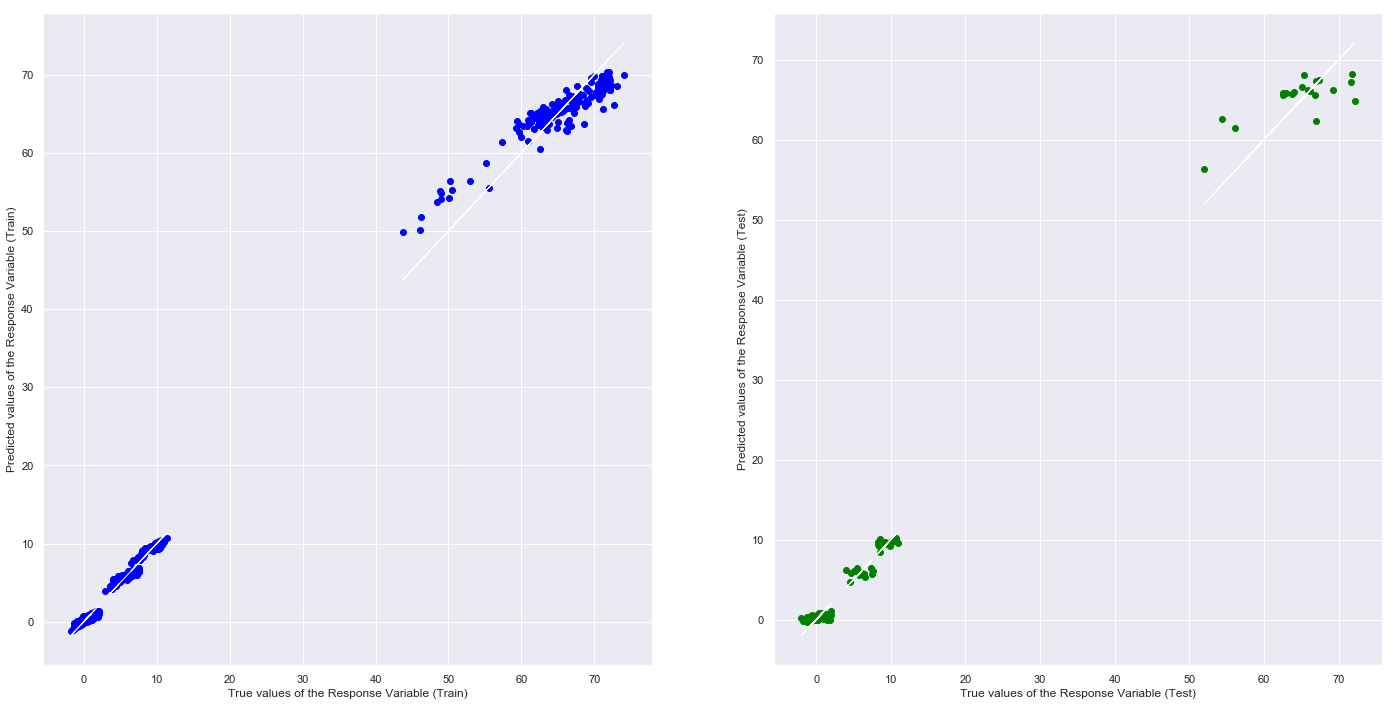

In [29]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [30]:
GDP2_predicted = regr.predict() ## how to predict?!?!?!?

TypeError: predict() missing 1 required positional argument: 'X'

In [31]:
from sklearn.datasets import make_regression
X, y = make_regression(n_features=100, n_informative=2,
                        random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)
regr.fit(X, y)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
score = regr.score(X,y)
print("The prediction score on the test data is {:.2f}%".format(score*100))

The prediction score on the test data is 92.23%


In [32]:
print(regr.feature_importances_)

[0.00000000e+00 9.97535485e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.21432285e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [33]:
X, y = make_regression(n_features=, n_informative=2,


SyntaxError: invalid syntax (<ipython-input-33-f3f948974fd5>, line 1)

In [34]:
import scipy as sp

In [35]:
data_M.head()

,country,Region indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,South Asia,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,South Asia,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,South Asia,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,South Asia,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,South Asia,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [43]:
data_pred = data_M.interpolate(method = 'linear')
data_pred.head(1000)

,country,Region indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,South Asia,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,South Asia,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,South Asia,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,South Asia,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,South Asia,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,South Asia,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,South Asia,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,South Asia,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,South Asia,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,South Asia,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,-0.981401,-0.926286,1.454051,0.546283,NaN,NaN,0.286599


In [42]:
#data_B = pd.DataFrame(data_pred[data_pred["Life Ladder"].isna()])

data_B.head()


,country,Region indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"


In [44]:
data_new = data_pred.replace("NaN", np.nan)
data_new.head(100)

,country,Region indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,South Asia,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,South Asia,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,South Asia,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,South Asia,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,South Asia,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,South Asia,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,South Asia,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,South Asia,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,South Asia,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,South Asia,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,-0.981401,-0.926286,1.454051,0.546283,NaN,NaN,0.286599


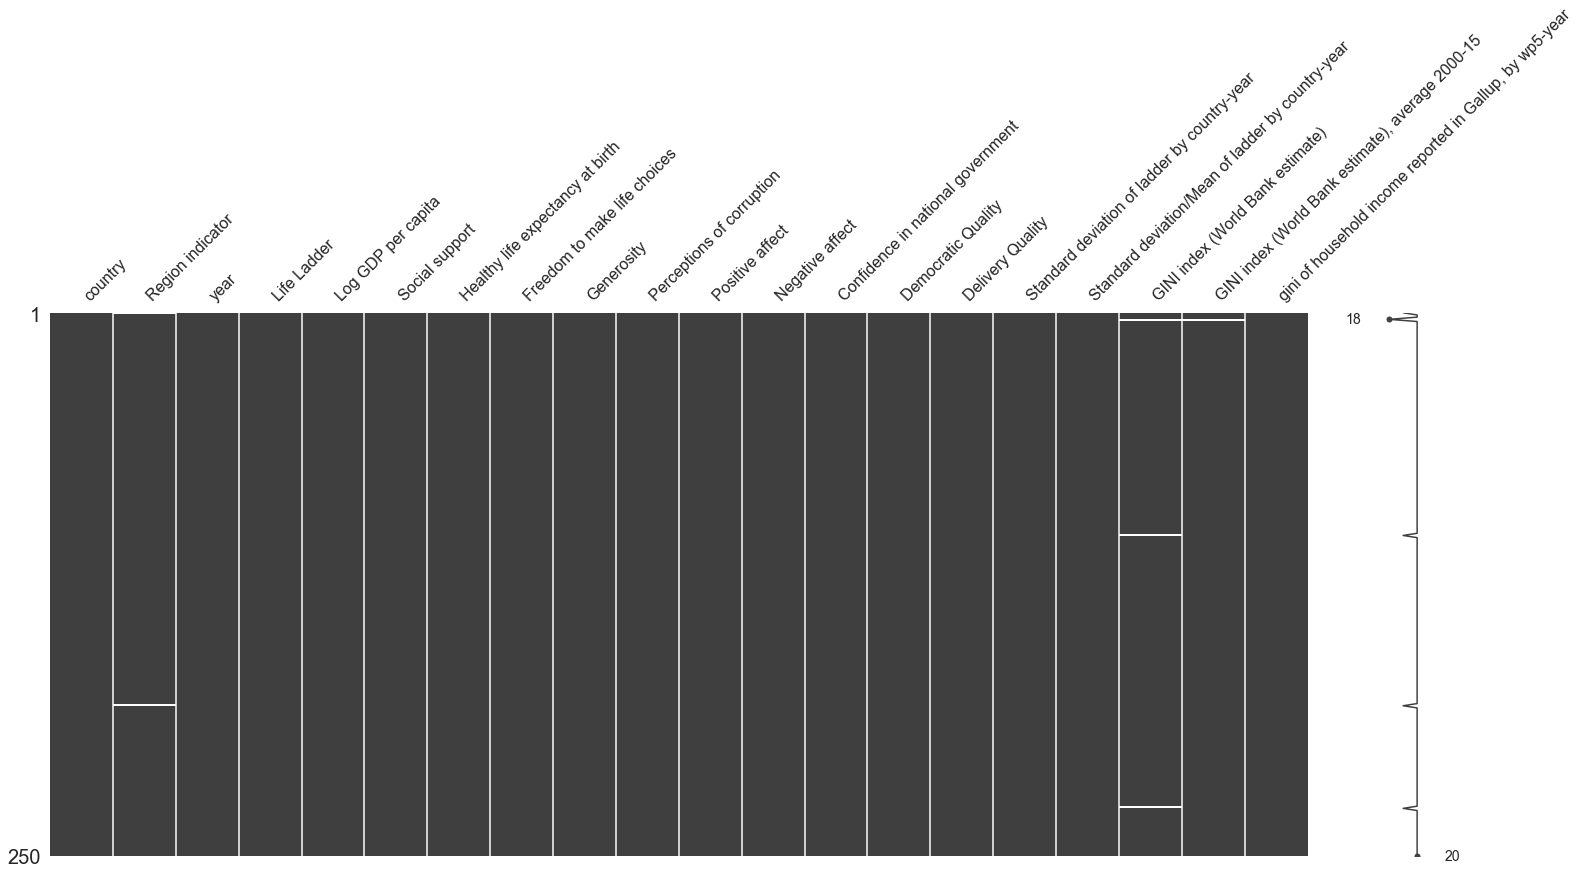

In [45]:
msn.matrix(data_new.sample(250))

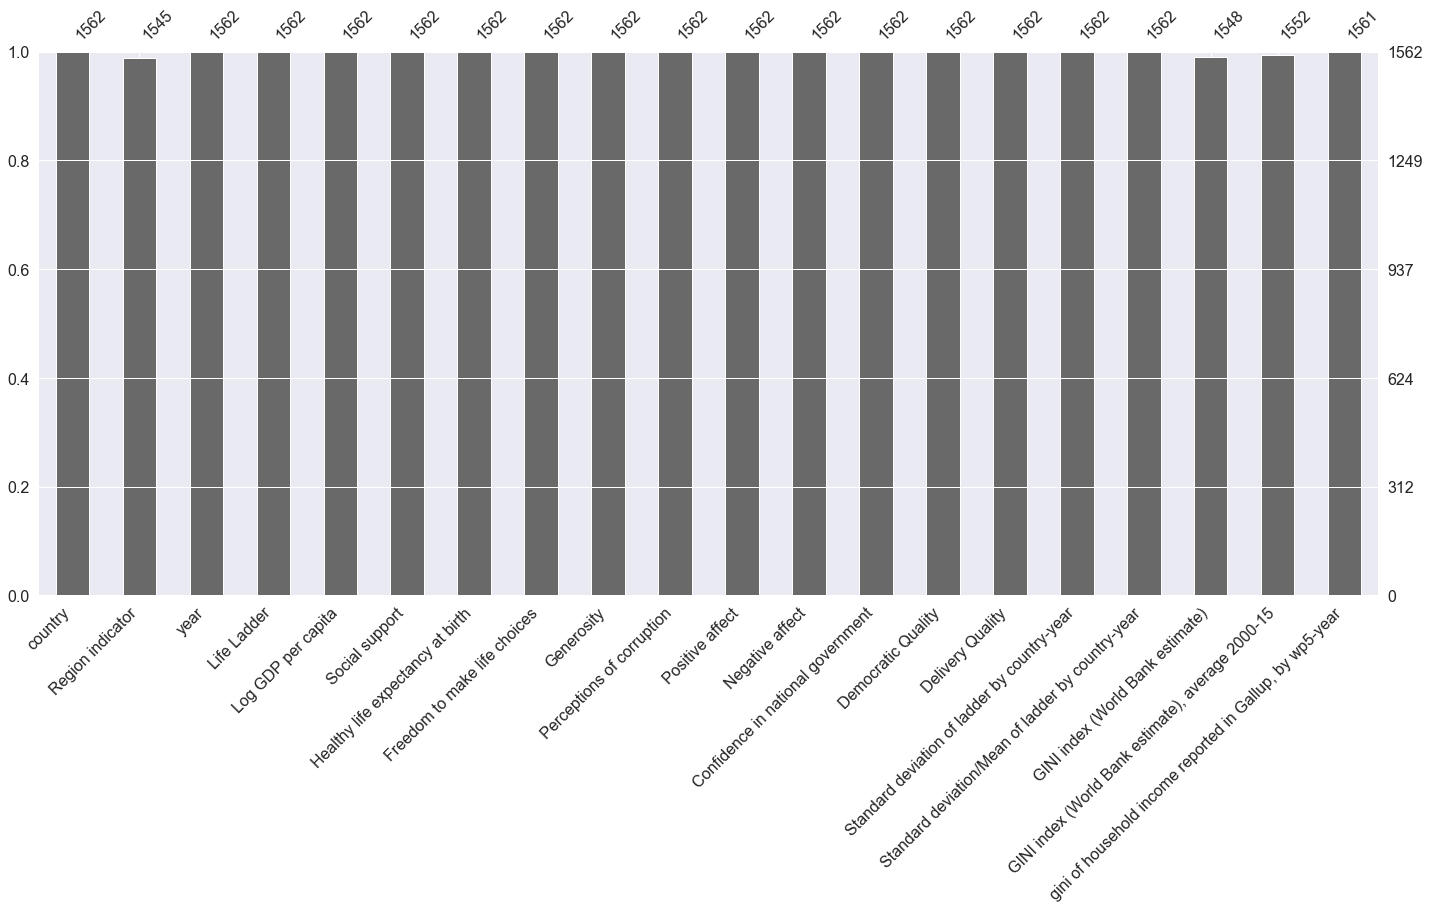

In [47]:
msn.bar(data_new.sample(1562))